In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import timedelta
import datetime as dt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Downloads/nyc_taxi_trip_duration.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
data.shape

(729322, 11)

In [4]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')

In [7]:
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

In [8]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [9]:
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429


In [10]:
data['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [11]:
data['store_and_fwd_flag']=data['store_and_fwd_flag'].map({'N':0,'Y':1})

In [12]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848


In [13]:
data['check_trip_duration']=(data['dropoff_datetime']-data['pickup_datetime']).map(lambda x: x.total_seconds())
dd=data[np.abs(data['check_trip_duration'].values-data['trip_duration'].values)>1]
dd.shape

(0, 12)

In [14]:
data['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

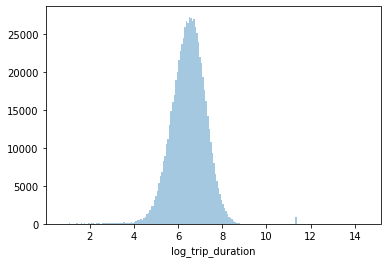

In [15]:
data['log_trip_duration']=np.log(data['trip_duration'].values+1)
sns.distplot(data['log_trip_duration'],kde=False,bins=200)
plt.show()

Text(0, 0.5, 'Frequency')

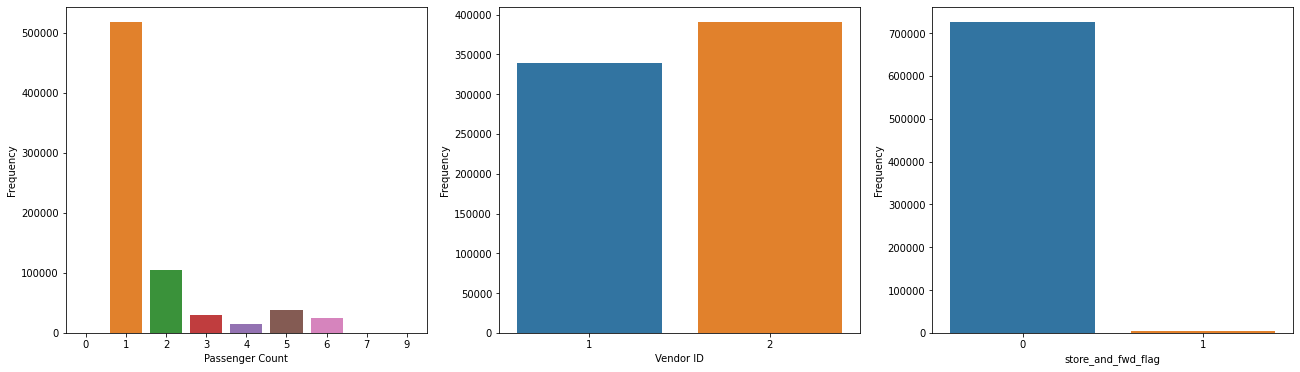

In [16]:
plt.figure(figsize=(22,6))

plt.subplot(131)
sns.countplot(data['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

plt.subplot(132)
sns.countplot(data['vendor_id'])
plt.xlabel('Vendor ID')
plt.ylabel('Frequency')

plt.subplot(133)
sns.countplot(data['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

In [17]:
data['pickup_datetime'].max(),data['pickup_datetime'].min()

(Timestamp('2016-06-30 23:59:37'), Timestamp('2016-01-01 00:01:14'))

In [18]:
data['day_of_week']=data['pickup_datetime'].dt.weekday
data['hour_of_day']=data['pickup_datetime'].dt.hour

Text(0, 0.5, 'Total Number of Pickups')

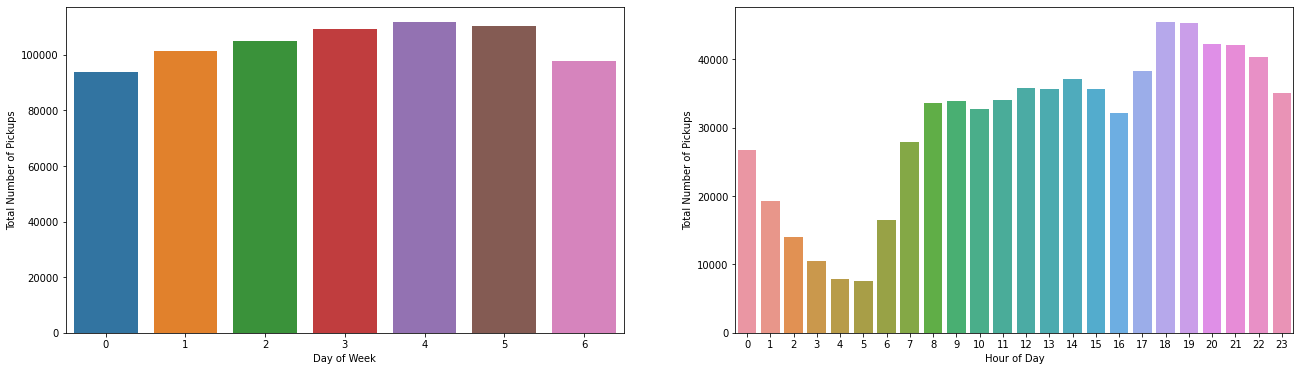

In [19]:
plt.figure(figsize=(22,6))

plt.subplot(121)
sns.countplot(data['day_of_week'])
plt.xlabel('Day of Week')
plt.ylabel('Total Number of Pickups')

plt.subplot(122)
sns.countplot(data['hour_of_day'])
plt.xlabel('Hour of Day')
plt.ylabel('Total Number of Pickups')

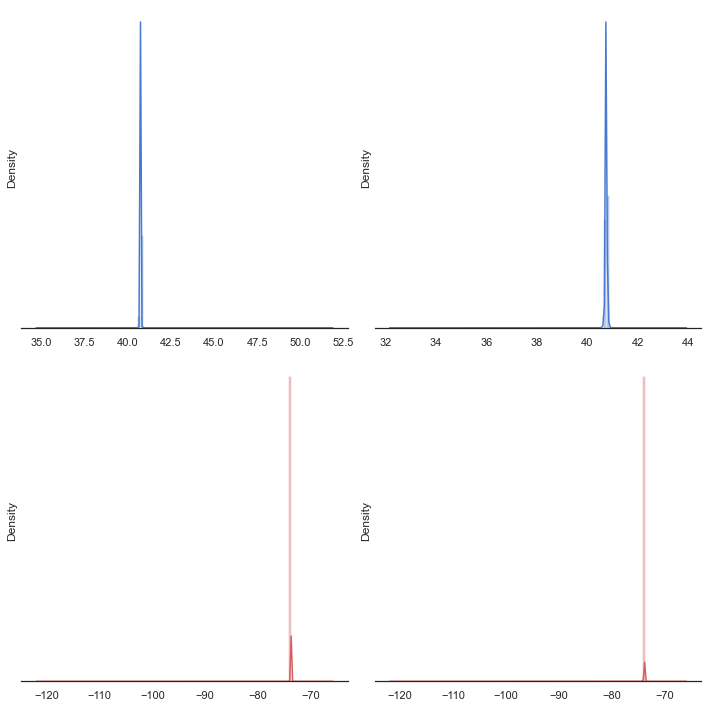

In [20]:
sns.set(style='white',palette='muted',color_codes=True)
f,axes=plt.subplots(2,2,figsize=(10,10),sharex=False,sharey=False)
sns.despine(left=True)
sns.distplot(data['pickup_latitude'].values,label='pickup_latitude',color="b",bins=100,ax=axes[0,0])
sns.distplot(data['pickup_longitude'].values,label='pickup_longitude',color="r",bins=100,ax=axes[1,0])
sns.distplot(data['dropoff_latitude'].values,label='dropoff_latitude',color="b",bins=100,ax=axes[0,1])
sns.distplot(data['dropoff_longitude'].values,label='dropoff_longitude',color="r",bins=100,ax=axes[1,1])
plt.setp(axes,yticks=[])
plt.tight_layout()
plt.show()

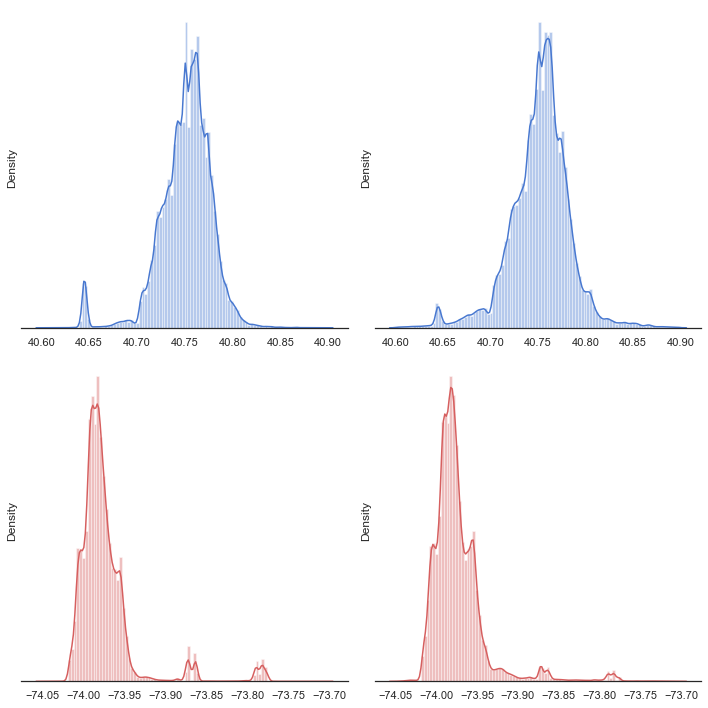

In [21]:
data=data.loc[(data.pickup_latitude>40.6)&(data.pickup_latitude<40.9)]
data=data.loc[(data.dropoff_latitude>40.6)&(data.dropoff_latitude<40.9)]
data=data.loc[(data.pickup_longitude>-74.05)&(data.pickup_longitude<-73.7)]
data=data.loc[(data.dropoff_longitude>-74.05)&(data.dropoff_longitude<-73.7)]
df=data.copy()
sns.set(style='white',palette='muted',color_codes=True)
f,axes=plt.subplots(2,2,figsize=(10,10),sharex=False,sharey=False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values,label='pickup_latitude',color="b",bins=100,ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values,label='pickup_longitude',color="r",bins=100,ax=axes[1,0])
sns.distplot(df['dropoff_latitude'].values,label='dropoff_latitude',color="b",bins=100,ax=axes[0,1])
sns.distplot(df['dropoff_longitude'].values,label='dropoff_longitude',color="r",bins=100,ax=axes[1,1])
plt.setp(axes,yticks=[])
plt.tight_layout()
plt.show()

In [22]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'check_trip_duration', 'log_trip_duration',
       'day_of_week', 'hour_of_day'],
      dtype='object')

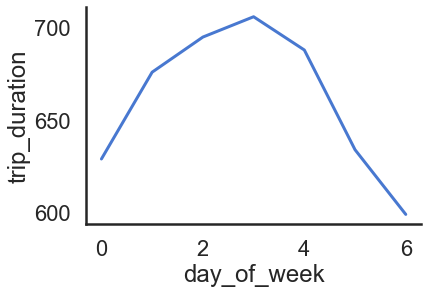

In [23]:
swad=pd.DataFrame(data.groupby(['day_of_week'])['trip_duration'].median())
swad.reset_index(inplace=True)

sns.set(style='white',palette='muted',color_codes=True)
sns.set_context("poster")
sns.lineplot(x='day_of_week',y='trip_duration',data=swad)
sns.despine(bottom=False)

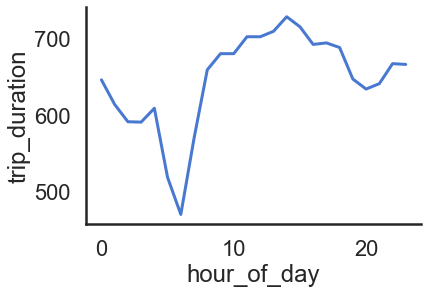

In [24]:
shad=pd.DataFrame(data.groupby(['hour_of_day'])['trip_duration'].median())
shad.reset_index(inplace=True)
sns.set(style='white',palette='muted',color_codes=True)
sns.set_context("poster")
sns.lineplot(x='hour_of_day',y='trip_duration',data=shad)
sns.despine(bottom=False)

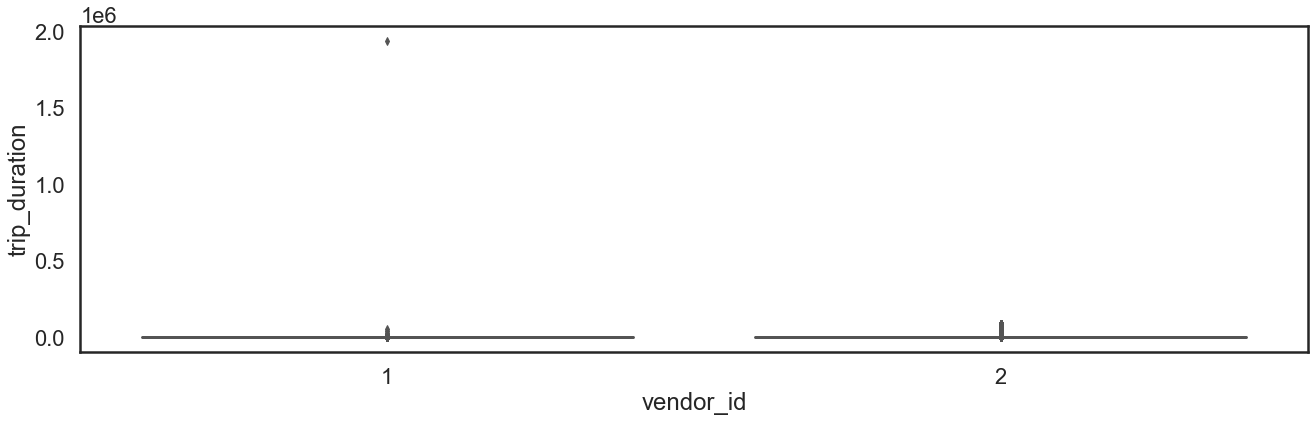

In [25]:
plt.figure(figsize=(22,6))
sns.boxplot(x='vendor_id',y='trip_duration',data=data)
plt.show()

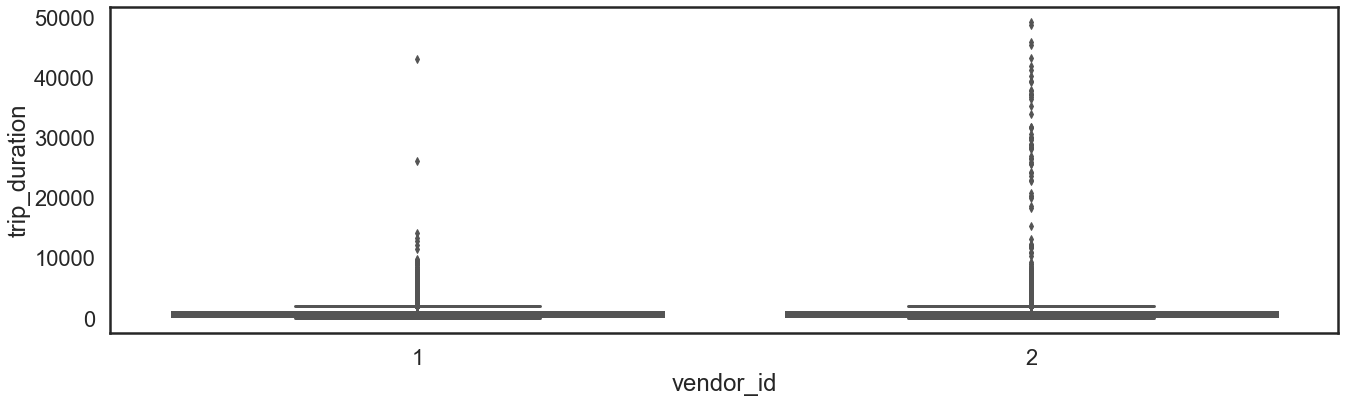

In [26]:
plt.figure(figsize=(22,6))
df_sub=data[data['trip_duration']<50000]
sns.boxplot(x='vendor_id',y='trip_duration',data=df_sub)
plt.show()

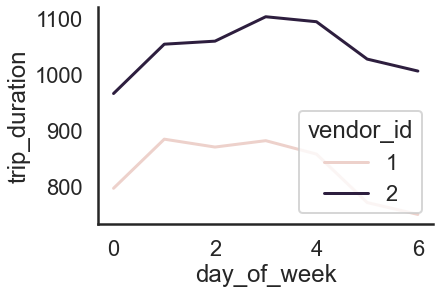

In [27]:
swdad=pd.DataFrame(data.groupby(['vendor_id','day_of_week'])['trip_duration'].mean())
swdad.reset_index(inplace=True)
sns.set(style='white',palette='muted',color_codes=True)
sns.set_context("poster")
sns.lineplot(x='day_of_week',y='trip_duration',hue='vendor_id',data=swdad)
sns.despine(bottom=False)

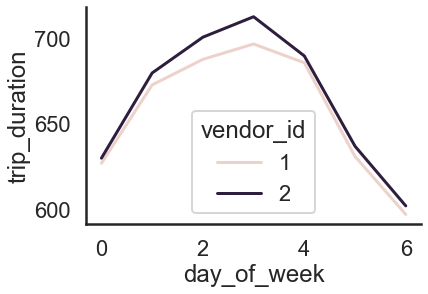

In [28]:
swdad=pd.DataFrame(data.groupby(['vendor_id','day_of_week'])['trip_duration'].median())
swdad.reset_index(inplace=True)
sns.set(style='white',palette='muted',color_codes=True)
sns.set_context("poster")
sns.lineplot(x='day_of_week',y='trip_duration',hue='vendor_id',data=swdad)
sns.despine(bottom=False)

In [29]:
data.passenger_count.value_counts()

1    515243
2    104576
5     38776
3     29561
6     24035
4     13972
0        31
9         1
Name: passenger_count, dtype: int64

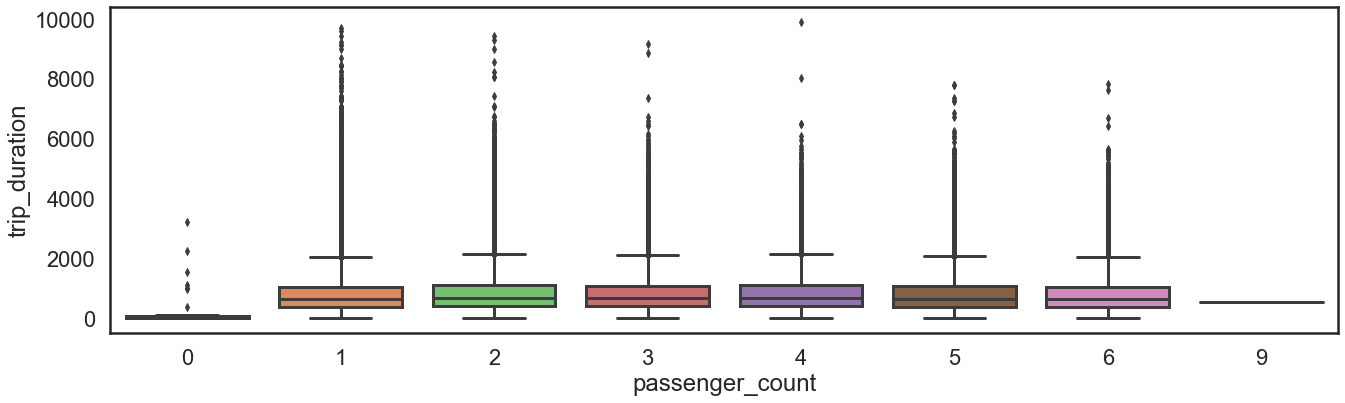

In [30]:
data.passenger_count.value_counts()
plt.figure(figsize=(22,6))
dsub=data[data['trip_duration']<10000]
sns.boxplot(x='passenger_count',y='trip_duration',data=dsub)
plt.show()

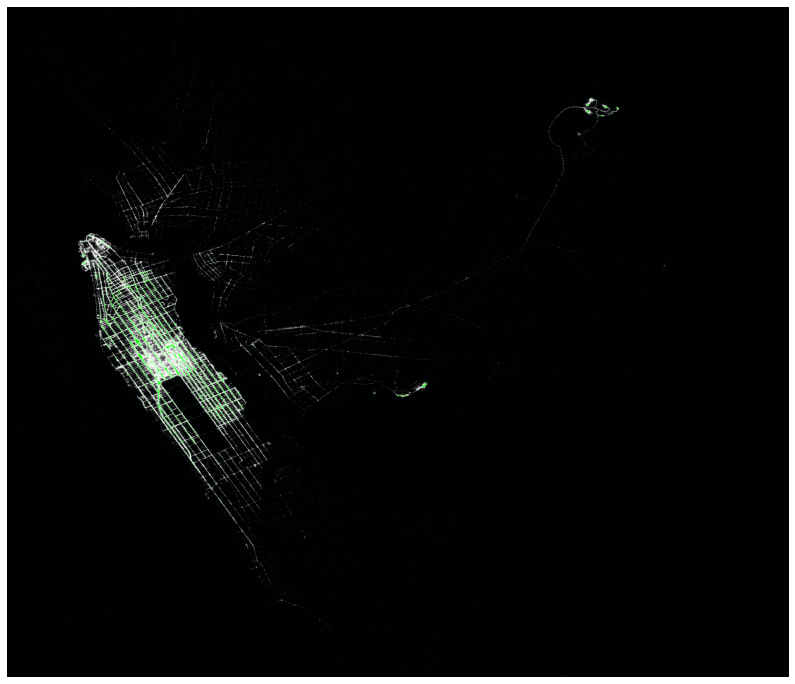

In [31]:
ddn=data.copy()
rgb=np.zeros((3000,3500,3),dtype=np.uint8)
rgb[...,0]=0
rgb[...,1]=1
rgb[...,2]=2
ddn['pick_lat_new']=list(map(int,(data['pickup_latitude']-(40.6000))*10000))
ddn['drop_lat_new']=list(map(int,(data['dropoff_latitude']-(40.6000))*10000))
ddn['pick_lon_new']=list(map(int,(data['pickup_longitude']-(-74.050))*10000))
ddn['drop_lon_new']=list(map(int,(data['dropoff_longitude']-(-74.050))*10000))
s_plot=pd.DataFrame(ddn.groupby(['pick_lat_new','pick_lon_new'])['id'].count())
s_plot.reset_index(inplace=True)
s_plot.head(20)
lat_l=s_plot['pick_lat_new'].unique()
for i in lat_l:
    lon_l=s_plot.loc[s_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
    unit=s_plot.loc[s_plot['pick_lat_new']==i]['id'].tolist()
    for j in lon_l:
        a=unit[lon_l.index(j)]
        if(a//255)>0:
            rgb[i,j,0]=255
            rgb[i,j,1]=0
            rgb[i,j,2]=0
        elif(a//10)>0:
            rgb[i,j,0]=0
            rgb[i,j,1]=255
            rgb[i,j,2]=0
        else:
            rgb[i,j,0]=255
            rgb[i,j,1]=255
            rgb[i,j,2]=255
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(14,20))
ax.imshow(rgb,cmap='hot')
ax.set_axis_off()

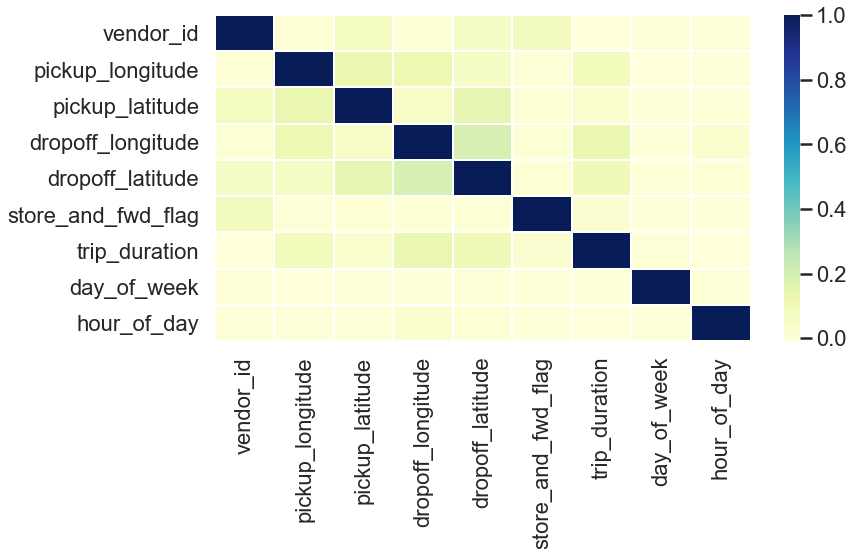

In [32]:
plt.figure(figsize=(12,6))
data=data.drop(['id','pickup_datetime','dropoff_datetime','passenger_count','check_trip_duration','log_trip_duration'],axis=1)
corr=data.apply(lambda x:pd.factorize(x)[0]).corr()
ax=sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=2,cmap='YlGnBu')

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

In [14]:
d_y=np.log1p(data['trip_duration'])

data.loc[:,'pickup_weekday']=data['pickup_datetime'].dt.weekday
data.loc[:,'pickup_weekofyear']=data['pickup_datetime'].dt.weekofyear
data.loc[:,'pickup_hour']=data['pickup_datetime'].dt.hour
data.loc[:,'pickup_minute']=data['pickup_datetime'].dt.minute
data.loc[:,'pickup_dt']=(data['pickup_datetime']-data['pickup_datetime'].min()).dt.total_seconds()
data.loc[:,'pickup_week_hour']=data['pickup_weekday']*24+data['pickup_hour']


In [15]:
y_d=data['pickup_longitude']-data['dropoff_longitude']
x_d=data['pickup_latitude']-data['dropoff_latitude']

data['dist_sq']=(y_d**2)+(x_d**2)
data['dist_sqrt']=data['dist_sq']**0.5

In [17]:
AVG_EARTH_RADIUS=6371
def h_array(la1,lo1,la2,lo2):
    la1,lo1,la2,lo2=map(np.radians,(la1,lo1,la2,lo2))
    lat=la2-la1
    lon=lo2-lo1
    d=np.sin(lat*0.5)**2+np.cos(la1)*np.cos(la2)*np.sin(lon*0.5)**2
    h=2*AVG_EARTH_RADIUS*np.arcsin(np.sqrt(d))
    return h

def d_array(la1,lo1,la2,lo2):
    lng_d_r=np.radians(lo2-lo1)
    la1,lo1,la2,lo2=map(np.radians,(la1,lo1,la2,lo2))
    y=np.sin(lng_d_r)*np.cos(la2)
    x=np.cos(la1)*np.sin(la2)-np.sin(la1)*np.cos(la2)*np.cos(lng_d_r)
    return np.degrees(np.arctan2(y,x))

data['haveraine_dist']=h_array(data['pickup_latitude'].values,data['pickup_longitude'].values,data['dropoff_latitude'].values,data['dropoff_longitude'].values)
data['direction']=d_array(data['pickup_latitude'].values,data['pickup_longitude'].values,data['dropoff_latitude'].values,data['dropoff_longitude'].values)

In [18]:
data['pickup_latitude_r3']=np.round(data['pickup_latitude'],3)
data['pickup_longitude_r3']=np.round(data['pickup_longitude'],3)
data['dropoff_latitude_r3']=np.round(data['dropoff_latitude'],3)
data['dropoff_longitude_r3']=np.round(data['dropoff_longitude'],3)

In [19]:
data.vendor_id.value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [20]:
data['vendor_id']=data['vendor_id']-1

In [21]:
np.sum(pd.isnull(data))

id                      0
vendor_id               0
pickup_datetime         0
dropoff_datetime        0
passenger_count         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
store_and_fwd_flag      0
trip_duration           0
pickup_weekday          0
pickup_weekofyear       0
pickup_hour             0
pickup_minute           0
pickup_dt               0
pickup_week_hour        0
dist_sq                 0
dist_sqrt               0
haveraine_dist          0
direction               0
pickup_latitude_r3      0
pickup_longitude_r3     0
dropoff_latitude_r3     0
dropoff_longitude_r3    0
dtype: int64

In [22]:
data.fillna(0,inplace=True)

In [23]:
data=data.drop(['id','pickup_datetime','dropoff_datetime','trip_duration','store_and_fwd_flag'],axis=1)

In [24]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_weekday,pickup_weekofyear,pickup_hour,pickup_minute,pickup_dt,pickup_week_hour,dist_sq,dist_sqrt,haveraine_dist,direction,pickup_latitude_r3,pickup_longitude_r3,dropoff_latitude_r3,dropoff_longitude_r3
0,1,1,-73.953918,40.778873,-73.963875,40.771164,0,9,16,40,5157547.0,16,0.000159,0.012592,1.199073,-135.634530,40.779,-73.954,40.771,-73.964
1,0,2,-73.988312,40.731743,-73.994751,40.694931,4,10,23,35,6132863.0,119,0.001397,0.037371,4.129111,-172.445217,40.732,-73.988,40.695,-73.995
2,1,2,-73.997314,40.721458,-73.948029,40.774918,6,7,17,59,4471099.0,161,0.005287,0.072712,7.250753,34.916093,40.721,-73.997,40.775,-73.948
3,1,6,-73.961670,40.759720,-73.956779,40.780628,1,1,9,44,380597.0,33,0.000461,0.021473,2.361097,10.043567,40.760,-73.962,40.781,-73.957
4,0,1,-74.017120,40.708469,-73.988182,40.740631,2,7,6,42,4084869.0,54,0.001872,0.043264,4.328534,34.280582,40.708,-74.017,40.741,-73.988


In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data,d_y,test_size=1/3,random_state=0)

In [27]:
mean_p=np.repeat(ytrain.mean(),len(ytest))
sqrt(mean_squared_error(ytest,mean_p))

0.7986672307875027

In [33]:
def cv_score(ml_model,rstate=12,thres=0.5,cols=data.columns):
    i=1
    cv_sc=[]
    df1=data.copy()
    df1=data[cols]
    kf=KFold(n_splits=5,random_state=rstate,shuffle=True)
    for tri,tei in kf.split(df1,d_y):
        print('\n{} of kfold{} '.format(i,kf.n_splits))
        xtr,xvl=df1.loc[tri],df1.loc[tei]
        ytr,yvl=d_y.loc[tri],d_y.loc[tei]
        model=ml_model
        model.fit(xtr,ytr)
        tval=model.predict(xtr)
        pval=model.predict(xvl)
        rmse_tr=sqrt(mean_squared_error(ytr,tval))
        rmse_s=sqrt(mean_squared_error(yvl,pval))
        suf=""
        msg=""
        msg+="Valid RMSE: {:.5f}".format(rmse_s)
        print("{}".format(msg))
        cv_sc.append(rmse_s)
        i+=1
    return cv_sc

In [34]:
lr_sc=cv_score(LinearRegression())


1 of kfold5 
Valid RMSE: 0.69118

2 of kfold5 
Valid RMSE: 0.61475

3 of kfold5 
Valid RMSE: 0.61439

4 of kfold5 
Valid RMSE: 0.63770

5 of kfold5 
Valid RMSE: 0.61848


In [35]:
dt_sc=cv_score(DecisionTreeRegressor(min_samples_leaf=25,min_samples_split=25))


1 of kfold5 
Valid RMSE: 0.42966

2 of kfold5 
Valid RMSE: 0.43381

3 of kfold5 
Valid RMSE: 0.44062

4 of kfold5 
Valid RMSE: 0.43259

5 of kfold5 
Valid RMSE: 0.43250


In [36]:
r_df=pd.DataFrame({'linear_regression':lr_sc,'dtree':dt_sc})

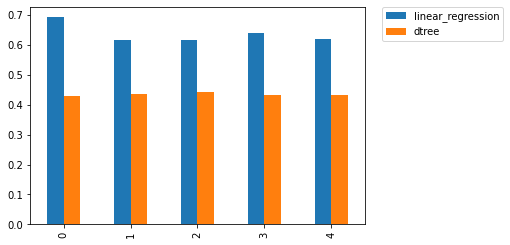

In [37]:
r_df.plot(y=['linear_regression','dtree'],kind='bar',legend=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()